# Дайте мне таблетки от жадности! И побольше, побольше!

![](https://cs4.pikabu.ru/post_img/2016/08/12/8/1471008417115067244.jpg)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts
from scipy.optimize import minimize

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

Как документировать свой код?

In [2]:
def square(x: float) -> float:
    return x ** 2

In [3]:
from typing import List, Tuple, Dict

In [4]:
def func_a(x: List[float], y: Tuple[bool], z: Dict[str, List[str]]):
    pass

In [5]:
from typing import Union, Optional

In [6]:
def func_b(x: Union[str, int, None]):
    pass

In [7]:
# Union[str, None] = Optional[str]

# Задаченька 1. Функция-няша и функция-бяка!

а) Найдите минимум фукнции $f(x_1, x_2) = (x_1 - 2)^2 + (x_2 - 4)^2$

In [8]:
def func_1(x1, x2):
    return (x1 - 2) ** 2 + (x2 - 4) ** 2

Однако, так не сработает.

In [9]:
def func_1(x: List[float]) -> float:
    return (x[0] - 2) ** 2 + (x[1] - 4) ** 2

In [10]:
# зададим стартовые значения, с которых начнем свой поиск
x_init = [0, 0]

In [11]:
optim_res = minimize(func_1, x_init)
optim_res

      fun: 9.095763293783874e-17
 hess_inv: array([[ 0.9, -0.2],
       [-0.2,  0.6]])
      jac: array([ 6.37085673e-09, -2.15944951e-09])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([2.        , 3.99999999])

In [12]:
optim_res.x, optim_res.fun

(array([2.        , 3.99999999]), 9.095763293783874e-17)

Теперь добавим в функцию параметр $a$: $f(x_1, x_2) = (x_1 - 2a)^2 + (x_2 - 4)^2$

б) Найдите экстремум функции при $a=4$ и при $a=10$.

In [26]:
def func_2(x: List[float], a: float = 1) -> float:
    return (x[0] - 2*a) ** 2 + (x[1] - 4) ** 2

In [28]:
x_init = [0, 0]
optim_res= minimize(func_2, x_init, args=4)
optim_res

      fun: 3.131976557517399e-12
 hess_inv: array([[ 0.59999985, -0.19999989],
       [-0.19999989,  0.90000014]])
      jac: array([-1.60278948e-06,  3.16307257e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([7.99999919, 4.00000157])

In [29]:
x_init = [0, 0]
optim_res= minimize(func_2, x_init, args=10)
optim_res

      fun: 2.3881933437907206e-11
 hess_inv: array([[ 0.51923086, -0.09615402],
       [-0.09615402,  0.98076916]])
      jac: array([ 2.14204335e-06, -9.52464809e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([20.00000106,  3.99999523])

In [30]:
def func_3(x: List[float], a: float = 1, b: float = 1) -> float:
    return (x[0] - 2 * a) ** 2 + (x[1] - 4 * b) ** 2

In [32]:
x_init = [0, 0]
optim_res = minimize(func_3, x_init, args=(4, 2))
optim_res

      fun: 1.0960365040671714e-15
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([6.17207405e-08, 6.17207405e-08])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([8.00000002, 8.00000002])

Но иногда встречаются функции-бяки :)

$f(x_1, x_2, x_3) = 0.01 (x_1 - 0.5)^2 + |x_1^2 - x_2| + |x_1^2 - x_3|$

в) найдите минимум этой функции устно

г*) найдите минимум этой функции с помощью `minimize` (автор задачи тоже не знает решения)

In [36]:
def func_4(x: List[float]) -> float:
    return 0.01*(x[0] - 0.5)** 2 + abs(x[0]**2 - x[1]) + abs(x[0]**2 - x[2])

In [37]:
x_init = [0, 0, 0]
optim_res = minimize(func_4, x_init)
optim_res

      fun: 0.0025
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([-0.00999997,  1.        ,  1.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 0
     njev: 94
   status: 2
  success: False
        x: array([0., 0., 0.])

Данная функция не нашла минимум функции.

In [38]:
x_init = [0, 0, 0]
optim_res = minimize(func_4, x_init, method='Nelder-Mead')
optim_res

 final_simplex: (array([[0.03077755, 0.00094606, 0.00094727],
       [0.03070671, 0.00094229, 0.00094293],
       [0.03070712, 0.00094213, 0.0009429 ],
       [0.03087131, 0.00095078, 0.00095323]]), array([0.00220291, 0.00220301, 0.00220318, 0.00220326]))
           fun: 0.0022029130300699013
       message: 'Optimization terminated successfully.'
          nfev: 280
           nit: 161
        status: 0
       success: True
             x: array([0.03077755, 0.00094606, 0.00094727])

Более-менее, нашли минимум. Для лучшего результата смотрим мой курсач по стохастическим методам оптимизации :)

д) нарисуйте хорошую функцию

In [45]:
x = np.arange(-3, 3, 1)
y = np.arange(-4, 3, 1)

In [46]:
x

array([-3, -2, -1,  0,  1,  2])

In [47]:
y

array([-4, -3, -2, -1,  0,  1,  2])

In [48]:
x_mesh, y_mesh = np.meshgrid(x, y)

In [49]:
x_mesh

array([[-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2]])

In [50]:
y_mesh

array([[-4, -4, -4, -4, -4, -4],
       [-3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2]])

In [52]:
z = func_1([x_mesh, y_mesh])
z

array([[89, 80, 73, 68, 65, 64],
       [74, 65, 58, 53, 50, 49],
       [61, 52, 45, 40, 37, 36],
       [50, 41, 34, 29, 26, 25],
       [41, 32, 25, 20, 17, 16],
       [34, 25, 18, 13, 10,  9],
       [29, 20, 13,  8,  5,  4]])

In [68]:
x = np.arange(-20, 20, 0.25)
y = np.arange(-20, 20, 0.25)
z = func_1(np.meshgrid(x, y))

In [69]:
import plotly.graph_objects as go

In [70]:
fig = go.Figure(data=go.Contour(z=z, x=x, y=y))
fig.show()

In [71]:
fig = go.Figure(data=go.Surface(z=z, x=x, y=y))
fig.show()

In [76]:
x_mesh, y_mesh = np.meshgrid(x, y)
xy = np.array([x_mesh, y_mesh]).reshape(2, len(x) * len(y)).T
xy = np.array([x_mesh, y_mesh]).reshape(2, len(x) * len(y)).T
z = np.apply_along_axis(func_1, 1, xy)
z_mesh = z.reshape(x_mesh.shape[0], -1)

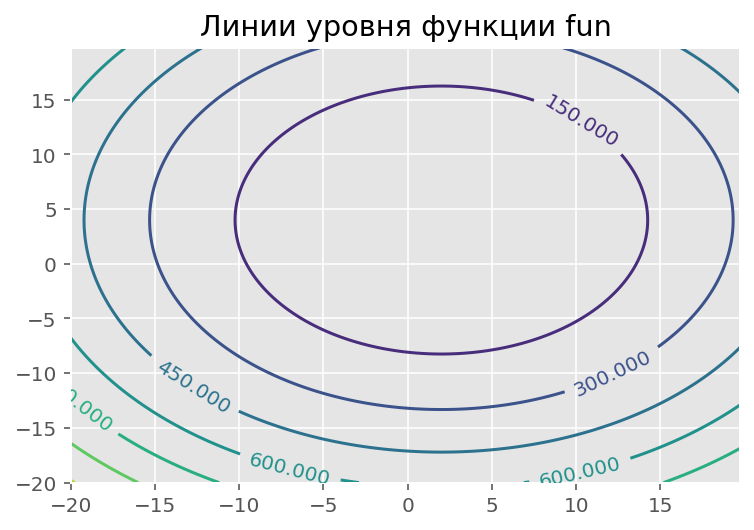

In [77]:
fig, ax = plt.subplots()
contour = ax.contour(x_mesh, y_mesh, z_mesh)
ax.clabel(contour, inline=1, fontsize=10)
ax.set_title('Линии уровня функции fun');

# Задачутка 2. Велика ты, правда, широка стоишь! Ты горами поднялась до поднебесья!

(с) Алексей Толстой

[Как известно](https://www.livelib.ru/quote/305456-malysh-i-karlson-kotoryj-zhivet-na-kryshe-astrid-lindgren), Фрекен Бок пьёт коньяк по утрам.

![](http://semyarf.com/UPLOAD/2016/01/21/frekenbok-216_700_0.jpg)

А у нас даже есть дневные данные (в граммах):

In [81]:
x = np.array([3.2, 7.9, 5.4, 4.9, 6.2, 4.3])

а) Предполагая, что $y_i$ независимы и нормальны $N(\mu, \sigma^2)$ выпишите функцию правдоподобия.

Чтобы гарантировать положительность параметра $\sigma^2$ функция у нас будет зависеть от вектора параметров $\theta$, причем $\theta_1 = \mu$, а $\theta_2 = \ln \sigma^2$.

$$
\ln L(x, \mu, \sigma^2) = -\dfrac{n}{2}\ln\sigma^2 - \dfrac{\sum_{i=1}^{n}\limits (x_i - \mu)^2}{2 \sigma^2}
$$

In [118]:
def neq_lklh(theta: List[float], x: np.ndarray) -> float:
    mu, ln_sigma_squared = theta
    sigma_squared = np.exp(ln_sigma_squared) # лайфхак для неотрицательности sigma^2
    n = len(x)
    lklh = -n/2 * np.log(sigma_squared) - np.sum((x - mu)**2) / (2*sigma_squared)
    return -lklh # хотим получить максимум

б) Найдите экстремум функции правдоподобия

In [119]:
theta_init = [0, 0]
optim_res = minimize(neq_lklh, theta_init, args=x)
optim_res

      fun: 5.353606615954091
 hess_inv: array([[0.35272762, 0.01304357],
       [0.01304357, 0.31980317]])
      jac: array([-1.96695328e-06,  2.08616257e-06])
  message: 'Optimization terminated successfully.'
     nfev: 68
      nit: 14
     njev: 17
   status: 0
  success: True
        x: array([5.31666595, 0.78453623])

In [120]:
print(f'lklh = {-optim_res.fun:.3} \nmu = {optim_res.x[0]:.3} \nsigma = {np.exp(optim_res.x[1]):.3}')

lklh = -5.35 
mu = 5.32 
sigma = 2.19


в) Получите тот же результат используя встроенный метод `stats.norm.fit`:

In [121]:
mu, sigma = sts.norm.fit(x)
sigma_squared = sigma ** 2
print(f'lklh = {-optim_res.fun:.3} \nmu = {mu:.3} \nsigma = {sigma_squared:.3}')

lklh = -5.35 
mu = 5.32 
sigma = 2.19


# Задачулечка 3. 

А ещё Фрекен-Бок иногда видит привидения! Данные по количеству привидений у нас тоже есть :)

In [122]:
fbock = pd.DataFrame({'x': [3.2, 7.9, 5.4, 4.9, 6.2, 4.3], 'ghost': [1, 2, 0, 0, 2, 0]})

In [123]:
fbock

,x,ghost
0,3.2,1
1,7.9,2
2,5.4,0
3,4.9,0
4,6.2,2
5,4.3,0


Предположим, что количество привидений имеет пуассоновское распределение с параметром $\lambda$. 

а) Оцените $\lambda$ с помощью ММП:

In [142]:
def neg_lklh(lambda_: float, ghost: np.ndarray) -> float:
    # лямбда должна быть положительной, так что у нас на входе будет \ln lambda
    # тот же трюк, чтобы лямбда никогда не стала отрицательной
    lambda_ = np.exp(lambda_)
    log_lklh = - lambda_ + ghost * np.log(lambda_) # про минус log(k!) забиваем, 
    # так как это константа никак не влияет на оптимизацию
    lklh = np.sum(log_lklh)
    return - lklh

In [134]:
lambda_init = 0 
optim_res = minimize(neg_lklh, lambda_init, args=fbock['ghost'])
optim_res

      fun: 5.91160778397651
 hess_inv: array([[0.2006664]])
      jac: array([8.34465027e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-0.18231992])

In [140]:
np.exp(optim_res.x)[0]§

0.8333347014268729

In [141]:
print(f'lklh = {-optim_res.fun:.3} \nlambda= {np.exp(optim_res.x)[0]:.3}')

lklh = -5.91 
lambda= 0.833


Предположим, что в $i$-й день интенсивность пуассоновского распределения $\lambda_i$ связана с количеством выпитого коньяка формулой $\lambda_i = \exp(a + b y_i)$.

б) Оцените параметры $a$ и $b$, лапками выписав функцию правдоподобия. 

In [146]:
def neq_lklh(theta: List[float], df: pd.DataFrame) -> float:
    a, b = theta
    lambda_ = np.exp(a + b * df['x'])
    log_lklh = - lambda_ + df['ghost'] * np.log(lambda_) # про минус log(k!) забиваем, 
    # так как это константа никак не влияет на оптимизацию
    lklh = np.sum(log_lklh)
    return - lklh

In [148]:
theta_ = [0, 0]
optim_res = minimize(neq_lklh, theta_, args=fbock)
optim_res

      fun: 4.901374802427494
 hess_inv: array([[ 3.65178738, -0.54899458],
       [-0.54899458,  0.08731151]])
      jac: array([5.96046448e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([-2.59878438,  0.4169601 ])

In [149]:
print(f'lklh = {-optim_res.fun:.3} \na= {optim_res.x[0]:.3} \nb= {optim_res.x[1]:.3}')

lklh = -4.9 
a= -2.6 
b= 0.417


Данная модель является довольно популярной и реализована в `statsmodels`.

в) Сравните ваши результаты с результатами в `statsmodels`:

In [150]:
import statsmodels.formula.api as smf

In [151]:
model = smf.poisson(data=fbock, formula='ghost ~ 1 + x')

In [153]:
model.fit().summary()

Optimization terminated successfully.
         Current function value: 1.047945
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  ghost   No. Observations:                    6
Model:                        Poisson   Df Residuals:                        4
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                  0.1384
Time:                        00:21:02   Log-Likelihood:                -6.2877
converged:                       True   LL-Null:                       -7.2979
Covariance Type:            nonrobust   LLR p-value:                    0.1552
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5988      1.918     -1.355      0.175      -6.358       1.161
x              0.4170      0.297      1.404      0.160      -0.165       0.999
==============================================================================
"""

# Задачушка 4

Предположим другую вероятностную модель. Теперь мы будем предполагать, что сам факт обнаружения хотя бы одного приведения, имеет вероятность $p_i$, зависящую от $y_i$:

$p_i = \exp(a + b y_i) / (1 + \exp(a + b y_i))$

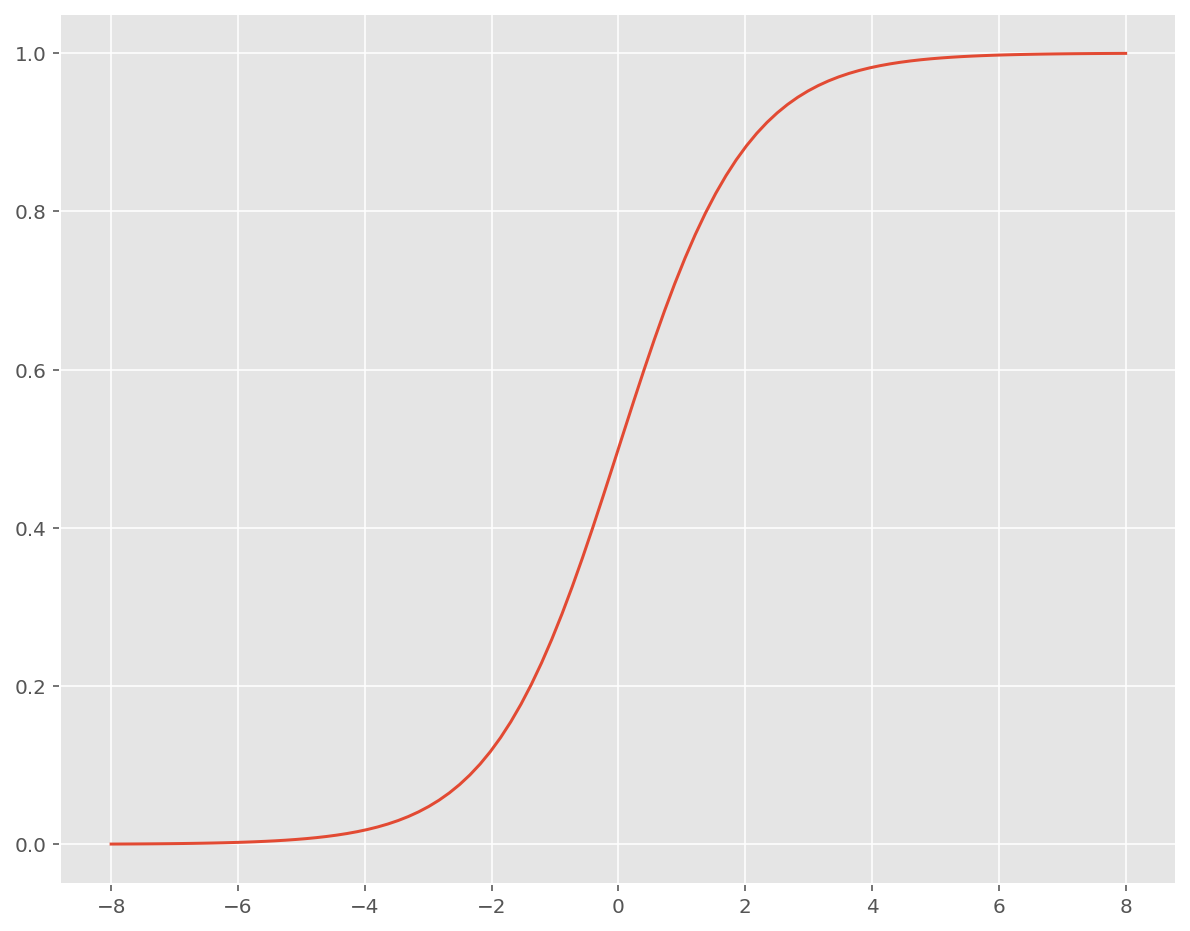

In [158]:
x = np.linspace(-8, 8, 100)
p = np.exp(x) / (1 + np.exp(x))

plt.figure(figsize=(10, 8))
plt.plot(x, p);

а) Введите дамми-переменную равную 1, если Фрекен Бок видела приведение:

In [163]:
fbock['saw_ghost'] = 1 * (fbock['ghost'] > 0)

In [164]:
fbock

,x,ghost,saw_ghost
0,3.2,1,1
1,7.9,2,1
2,5.4,0,0
3,4.9,0,0
4,6.2,2,1
5,4.3,0,0


б) Определив лапками функцию правдоподобия, оцените $a$ и $b$:

In [171]:
# Выпишем функцию максимального правдоподобия для биномиального распределения с параметром p

def neg_lklh(theta: List[float], df: pd.DataFrame) -> float:
    a, b = theta 
    p = np.exp(a + b * df['x']) / (1 + np.exp(a + b * df['x']))
    # логарифм функции правдоподобия для биномиального распределения
    log_lklh =  df['saw_ghost'] * np.log(p) + (1 - df['saw_ghost']) * np.log(1 - p)
    lklh = np.sum(log_lklh)
    return -lklh

In [172]:
theta_init = [0, 0]
optim_res = minimize(neg_lklh, theta_init, args=fbock)
optim_res

      fun: 3.8709632618137633
 hess_inv: array([[10.60782164, -1.8768471 ],
       [-1.8768471 ,  0.3567765 ]])
      jac: array([-1.49011612e-07,  5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([-2.35157624,  0.44383861])

In [173]:
a, b = optim_res.x

In [174]:
print(f'a = {a:.3}, b = {b:.3}')

a = -2.35, b = 0.444


в) Оцените $a$ и $b$ с помощью `statsmodels`. Нужная модель называется `logit`.

In [176]:
model = smf.logit(data=fbock, formula='saw_ghost ~ 1 + x')
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.645161
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              saw_ghost   No. Observations:                    6
Model:                          Logit   Df Residuals:                        4
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:                 0.06923
Time:                        00:43:57   Log-Likelihood:                -3.8710
converged:                       True   LL-Null:                       -4.1589
Covariance Type:            nonrobust   LLR p-value:                    0.4479
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3516      3.376     -0.697      0.486      -8.969       4.266
x              0.4438      0.620      0.716      0.474      -0.772       1.660
==============================================================================
"""